In [1]:
from gan import gan
import matplotlib.pyplot as plt
import numpy as np

Using TensorFlow backend.


In [10]:
starwars = gan(ndays=4)
starwars.make_generator()
starwars.make_discriminator()
starwars.model()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 64)                12352     
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 64)                0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 64)                256       
_________________________________________________________________
dense_9 (Dense)              (None, 128)               8320      
_________________________________________________________________
leaky_re_lu_7 (LeakyReLU)    (None, 128)               0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 128)               512       
_________________________________________________________________
dense_10 (Dense)             (None, 256)               33024     
__________

In [11]:
import pandas as pd
dfile = '../notebooks/subsampled_4d.csv'
df = pd.read_csv(dfile, sep='\s+', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,16374,16375,16376,16377,16378,16379,16380,16381,16382,16383
0,0.802652,-0.085702,-0.342189,-0.002655,-0.045915,0.342401,0.361984,-0.332196,0.469128,0.659646,...,-0.883553,0.504595,0.626793,-0.440893,-0.438905,-0.395067,-0.806648,-0.396474,-0.200909,-0.203732
1,0.397227,-0.224309,-0.045753,0.097251,-0.442355,0.130037,0.620915,-0.250581,0.202345,0.626363,...,-0.916525,0.658179,0.567513,-0.256272,-0.311594,-0.211513,-0.895888,-0.064909,-0.004963,-0.228847
2,0.233837,0.084215,-0.129893,0.274482,-0.538571,0.031888,0.666732,-0.095235,0.064323,0.585430,...,-0.966727,0.711697,0.498151,-0.358134,-0.272255,-0.246565,-0.753760,0.129942,0.155397,-0.128029
3,0.098603,0.410027,0.095666,0.381005,-0.083523,-0.112002,0.485105,-0.045208,-0.206358,0.456394,...,-0.865246,0.446821,0.424045,-0.030004,-0.119941,-0.195695,-0.299801,0.230101,0.524140,0.269100
4,0.256425,0.460166,0.310542,0.569557,-0.090522,-0.268609,0.063367,-0.000617,-0.104728,0.498338,...,-0.846916,0.138391,0.329489,0.246129,-0.086462,-0.198315,0.243549,0.168061,0.619138,0.323734


In [12]:
print(df.values.T.shape)

(16384, 192)


In [13]:
starwars.X_train = df.values.T

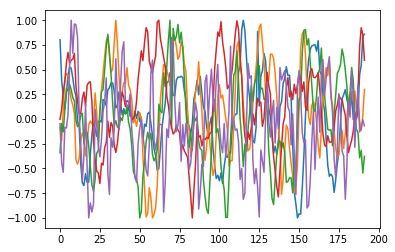

In [14]:
starwars.plot_some_data(nd=5)

In [15]:
%%time 
starwars.train(epochs=200)

Epoch: 0 D loss: 0.6905232667922974 G loss: 0.6030740141868591
Epoch: 10 D loss: 0.6842504739761353 G loss: 0.7714701890945435
Epoch: 20 D loss: 0.6963773965835571 G loss: 0.6810075640678406
Epoch: 30 D loss: 0.7016361951828003 G loss: 0.661017894744873
Epoch: 40 D loss: 0.6899312734603882 G loss: 0.6767670512199402
Epoch: 50 D loss: 0.6957671046257019 G loss: 0.687696099281311
Epoch: 60 D loss: 0.6955184936523438 G loss: 0.686469316482544
Epoch: 70 D loss: 0.6988539695739746 G loss: 0.6921945810317993
Epoch: 80 D loss: 0.6984869241714478 G loss: 0.6891683340072632
Epoch: 90 D loss: 0.6909725666046143 G loss: 0.6911135315895081
Epoch: 100 D loss: 0.6949477195739746 G loss: 0.6953694224357605
Epoch: 110 D loss: 0.6943269968032837 G loss: 0.6968778967857361
Epoch: 120 D loss: 0.6897371411323547 G loss: 0.6913000345230103
Epoch: 130 D loss: 0.69321209192276 G loss: 0.6953071355819702
Epoch: 140 D loss: 0.6921728849411011 G loss: 0.6929168105125427
Epoch: 150 D loss: 0.6939305663108826 G l

Fake images shape : (1, 192)


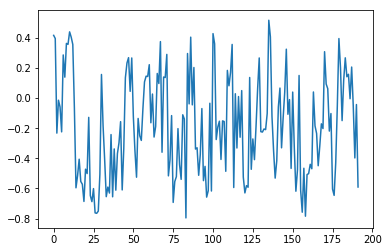

In [16]:
starwars.make_img()
plt.show()

Fake images shape : (5, 192)


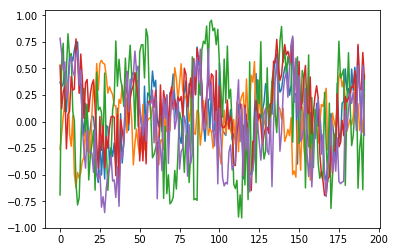

In [17]:
nd = 5
noise = starwars.noise(nd)
fake_images = starwars.gen_model.predict(noise)
print(f'Fake images shape : {fake_images.shape}')
fig, ax = plt.subplots()
ax.plot(fake_images.T)

In [ ]:
# 